In [6]:
%matplotlib inline
import bz2
from mpl_toolkits.basemap import Basemap  # import Basemap matplotlib toolkit
import numpy as np
import matplotlib.pyplot as plt
# import pygrib # import pygrib interface to grib_api
import iris_grib

ImportError: cannot import name abf

In [1]:
import iris

In [22]:
cubes = iris.load_cube('./raw_data/grib/SWDIFDS_RAD.2D.201509.grb')

In [23]:
print(cubes)

UNKNOWN LOCAL PARAM 23.201 / (unknown) (time: 720; grid_latitude: 824; grid_longitude: 848)
     Dimension coordinates:
          time                              x                   -                    -
          grid_latitude                     -                   x                    -
          grid_longitude                    -                   -                    x
     Scalar coordinates:
          forecast_period: 0 hours
          originating_centre: unknown centre edzw


In [94]:
testcube = cubes[12]

In [110]:
import time

In [116]:
print(testcube.coords('time')[0].cell(0).point)

400309.0


In [117]:
testcube.coords('time')

[DimCoord(array([ 400309.]), standard_name='time', units=Unit('hours since 1970-01-01 00:00:00', calendar='gregorian'))]

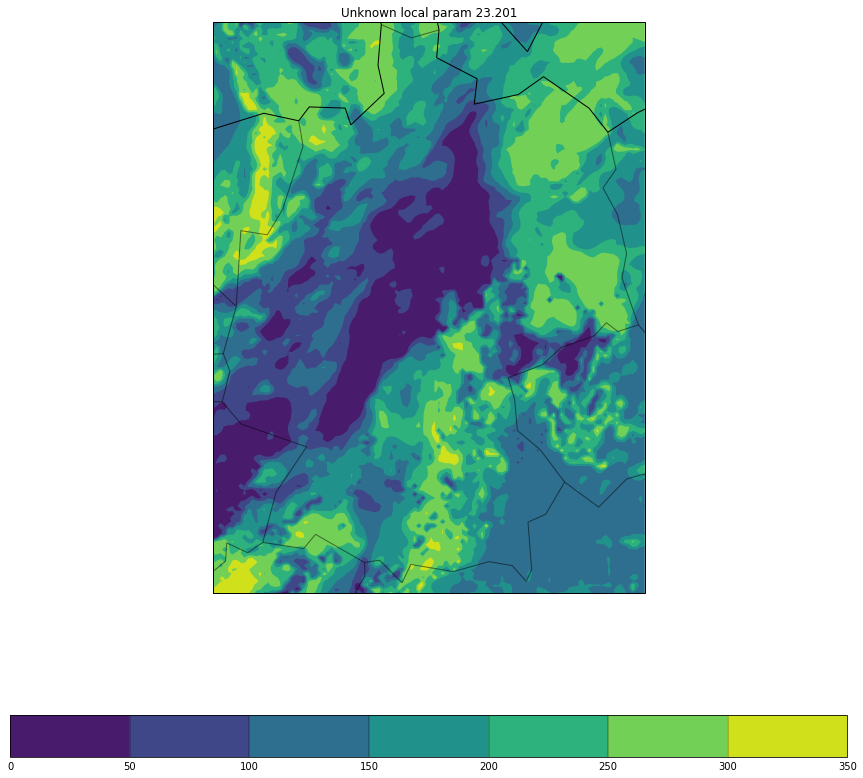

In [90]:
from __future__ import (absolute_import, division, print_function)
from six.moves import (filter, input, map, range, zip)  # noqa

import matplotlib.pyplot as plt

import iris
import iris.quickplot as qplt
import cartopy.feature as feature
f, ax = plt.subplots(figsize=(15,15))
# Draw the contour with 25 levels.
ax = qplt.contourf(cubes[12][365:510, 375:485])

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().add_feature(feature.BORDERS, linestyle='-', alpha=.5)
# plt.gca().add_feature(feature.LAND)
plt.show()

In [89]:
cubes[12].data[365:510, 375:485].shape

(145, 110)